# AIVLE스쿨 4기 DX트랙 5차 미니프로젝트 
## [미션#2] 중증질환 예측 데이터 분석

 [주의]
 * 본 자료는 임의로 가공된 응급 출동 데이터입니다. 의료적 소견이 전혀 없는 자료임을 참고해 주세요
 * 임의로 가공된 증상 및 중증 질환 결과를 할용하여, 증상에 따른 환자의 중증 질환을 예측하고자 합니다.


[미션] 
 * 증상 데이터 (Features) 와 중증 질환(Target)의 특징 파악 (단변량 분석)
 * 증상 데이터 (Features) 와 중증 질환(Target) 간의 관계 분석 (이변량 분석)
 * AI 모델링을 위한 데이터 전처리 

In [33]:
# 라이브러리 불러오기 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

plt.rcParams['font.family'] = 'Malgun Gothic'

In [34]:
# 응급 출동 데이터 불러오기
# 파일명 119_emergency_dispatch.csv, encoding='cp949'

data = pd.read_csv('119_emergency_dispatch.csv', encoding='cp949')
data.head()

ID        출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  ...  \
0  P10715  2023-09-30  성**  여자  65  36.9     102      66      1       0  ...   
1  P10959  2023-10-26  표**  남자  86  36.7     106      72      0       0  ...   
2  P11863  2023-10-05  변**  여자  21  38.1     120      77      0       0  ...   
3  P12186  2023-10-17  도**  남자  57  36.5     129      75      0       0  ...   
4  P15043  2023-10-01  송**  여자  88  39.1     103      65      0       0  ...   

   통증  만지면 아프다  무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  
0   0        0    0   0    0   1         0        0  심근경색      8  
1   0        1    0   0    0   0         0        0  복부손상     40  
2   0        1    0   0    0   0         0        0  복부손상     27  
3   0        0    0   0    0   1         0        0   뇌경색     26  
4   0        1    0   0    0   0         0        0  복부손상     62  

[5 rows x 23 columns]

In [35]:
data.columns

Index(['ID', '출동일시', '이름', '성별', '나이', '체온', '수축기 혈압', '이완기 혈압', '호흡 곤란',
       '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도',
       '말이 어눌해졌다', '시력이 흐려짐', '중증질환', '이송 시간'],
      dtype='object')

### 1) 데이터셋(data)의 기초 정보 확인하기

In [36]:
# data 데이터프레임의 행, 열 개수 확인
data.shape

(17210, 23)

In [37]:
# data 데이터프레임의 컬럼명, 데이터 개수, 타입 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210 entries, 0 to 17209
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        17210 non-null  object 
 1   출동일시      17210 non-null  object 
 2   이름        17210 non-null  object 
 3   성별        17210 non-null  object 
 4   나이        17210 non-null  int64  
 5   체온        17210 non-null  float64
 6   수축기 혈압    17210 non-null  int64  
 7   이완기 혈압    17210 non-null  int64  
 8   호흡 곤란     17210 non-null  int64  
 9   간헐성 경련    17210 non-null  int64  
 10  설사        17210 non-null  int64  
 11  기침        17210 non-null  int64  
 12  출혈        17210 non-null  int64  
 13  통증        17210 non-null  int64  
 14  만지면 아프다   17210 non-null  int64  
 15  무감각       17210 non-null  int64  
 16  마비        17210 non-null  int64  
 17  현기증       17210 non-null  int64  
 18  졸도        17210 non-null  int64  
 19  말이 어눌해졌다  17210 non-null  int64  
 20  시력이 흐려짐   17210 non-null  in

In [38]:
# data 데이터프레임의 하위 3개 행 확인
data.tail(3)

ID        출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  \
17207  P22512  2023-10-20  표**  여자  65  36.9      95      78      0       0   
17208  P24482  2023-10-20  채**  남자  14  36.3     105      72      0       0   
17209  P27091  2023-10-20  염**  남자  75  36.5     133      78      0       0   

       ...  통증  만지면 아프다  무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  
17207  ...   0        0    1   0    0   0         1        0   뇌출혈     18  
17208  ...   0        0    1   0    0   0         1        0   뇌출혈     60  
17209  ...   0        0    0   0    0   0         0        0  복부손상      5  

[3 rows x 23 columns]

In [39]:
# data 데이터프레임에 결측치 확인 isna(), sum()
# 결측치가 있는 경우, 삭제하기

data.isna().sum()

ID          0
출동일시        0
이름          0
성별          0
나이          0
체온          0
수축기 혈압      0
이완기 혈압      0
호흡 곤란       0
간헐성 경련      0
설사          0
기침          0
출혈          0
통증          0
만지면 아프다     0
무감각         0
마비          0
현기증         0
졸도          0
말이 어눌해졌다    0
시력이 흐려짐     0
중증질환        0
이송 시간       0
dtype: int64

### 2) 데이터 전처리

* 기존 컬럼을 이용하여 새로운 컬럼을 생성
* 추가해야 할 컬럼 내용
  * 연령구분 : 나이 컬럼을 활용하여 [신생아, 10대미만, 10대, 20대~ 80대, 90이상으로 구분]
  * 출동월 : 출동일시 컬럼을 활용하여 출동월을 추출
  * 발열 : 체온 컬럼을 활용하여, 37도 이상인 경우 1, 이하인 경우 0으로 구분
  * 고혈압 : 수축기 혈압 컬럼을 활용하여 140이상인 경우 1, 그렇지 않으면 0으로 구분
  * 저혈압 : 수축기 혈압 컬럼을 활용하여 90이하인 경우 1, 그렇지 않으면 0으로 구분
  

In [40]:
# 1) 연령구분 정보 구하기
# '나이' 컬럼을 활용하여 [신생아, 10대미만, 10대, 20대~ 80대, 90이상]으로 구분

data['연령구분'] = pd.cut(data['나이'], bins=[-1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, np.inf], 
                     labels=['신생아', '10대미만', '10대','20대','30대','40대','50대','60대','70대','80대','90이상'], right=False)
data.head()
# data.tail(20)

# display(data.loc[data['나이']==19].head(3))
# display(data.loc[data['나이']==10].head(3))
# display(data.loc[data['나이']==20].head(3))
# display(data.loc[data['나이']==29].head(3))
data.head(5)

ID        출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  ...  \
0  P10715  2023-09-30  성**  여자  65  36.9     102      66      1       0  ...   
1  P10959  2023-10-26  표**  남자  86  36.7     106      72      0       0  ...   
2  P11863  2023-10-05  변**  여자  21  38.1     120      77      0       0  ...   
3  P12186  2023-10-17  도**  남자  57  36.5     129      75      0       0  ...   
4  P15043  2023-10-01  송**  여자  88  39.1     103      65      0       0  ...   

   만지면 아프다  무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  연령구분  
0        0    0   0    0   1         0        0  심근경색      8   60대  
1        1    0   0    0   0         0        0  복부손상     40   80대  
2        1    0   0    0   0         0        0  복부손상     27   20대  
3        0    0   0    0   1         0        0   뇌경색     26   50대  
4        1    0   0    0   0         0        0  복부손상     62   80대  

[5 rows x 24 columns]

In [41]:
# '연령구분' 컬럼의 고유한 값(범주)별 건수 확인하기 : value_counts()

data['연령구분'].value_counts()

80대      3115
70대      3031
60대      2189
50대      2161
40대      1724
30대      1657
10대      1178
10대미만    1033
20대       720
90이상      402
신생아         0
Name: 연령구분, dtype: int64

In [42]:
# 2) 출동월 정보 구하기
# 출동일자 컬럼에서 출동월 정보를 추출하기

data['출동일시'] = pd.to_datetime(data['출동일시'])
data['출동월'] = data['출동일시'].dt.month
data.head()

ID       출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  ...  \
0  P10715 2023-09-30  성**  여자  65  36.9     102      66      1       0  ...   
1  P10959 2023-10-26  표**  남자  86  36.7     106      72      0       0  ...   
2  P11863 2023-10-05  변**  여자  21  38.1     120      77      0       0  ...   
3  P12186 2023-10-17  도**  남자  57  36.5     129      75      0       0  ...   
4  P15043 2023-10-01  송**  여자  88  39.1     103      65      0       0  ...   

   무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  연령구분  출동월  
0    0   0    0   1         0        0  심근경색      8   60대    9  
1    0   0    0   0         0        0  복부손상     40   80대   10  
2    0   0    0   0         0        0  복부손상     27   20대   10  
3    0   0    0   1         0        0   뇌경색     26   50대   10  
4    0   0    0   0         0        0  복부손상     62   80대   10  

[5 rows x 25 columns]

In [43]:
# 3) 발열 정보 구하기
# 체온이 37도 이상이면 1, 그렇지 않으면 0

data['발열'] = [ 1 if x>=37  else 0 for x in data['체온'] ]
data.head()

ID       출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  ...  \
0  P10715 2023-09-30  성**  여자  65  36.9     102      66      1       0  ...   
1  P10959 2023-10-26  표**  남자  86  36.7     106      72      0       0  ...   
2  P11863 2023-10-05  변**  여자  21  38.1     120      77      0       0  ...   
3  P12186 2023-10-17  도**  남자  57  36.5     129      75      0       0  ...   
4  P15043 2023-10-01  송**  여자  88  39.1     103      65      0       0  ...   

   마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  연령구분  출동월  발열  
0   0    0   1         0        0  심근경색      8   60대    9   0  
1   0    0   0         0        0  복부손상     40   80대   10   0  
2   0    0   0         0        0  복부손상     27   20대   10   1  
3   0    0   1         0        0   뇌경색     26   50대   10   0  
4   0    0   0         0        0  복부손상     62   80대   10   1  

[5 rows x 26 columns]

In [44]:
# 4) 고혈압 정보 구하기
# 수축기 혈압 컬럼을 활용하여 140이상인 경우 1, 그렇지 않으면 0으로 구분

data['고혈압'] = [ 1 if x>=140 else 0 for x in data['수축기 혈압' ] ]
data.head()

ID       출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  ...  \
0  P10715 2023-09-30  성**  여자  65  36.9     102      66      1       0  ...   
1  P10959 2023-10-26  표**  남자  86  36.7     106      72      0       0  ...   
2  P11863 2023-10-05  변**  여자  21  38.1     120      77      0       0  ...   
3  P12186 2023-10-17  도**  남자  57  36.5     129      75      0       0  ...   
4  P15043 2023-10-01  송**  여자  88  39.1     103      65      0       0  ...   

   현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  연령구분  출동월  발열  고혈압  
0    0   1         0        0  심근경색      8   60대    9   0    0  
1    0   0         0        0  복부손상     40   80대   10   0    0  
2    0   0         0        0  복부손상     27   20대   10   1    0  
3    0   1         0        0   뇌경색     26   50대   10   0    0  
4    0   0         0        0  복부손상     62   80대   10   1    0  

[5 rows x 27 columns]

In [45]:
# 5) 저혈압 정보 구하기
# 수축기 혈압이 90이하인 경우 1, 그렇지 않으면 0

data['저혈압'] = [1 if x<=90 else 0 for x in data['수축기 혈압']]
data.head()

ID       출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  ...  \
0  P10715 2023-09-30  성**  여자  65  36.9     102      66      1       0  ...   
1  P10959 2023-10-26  표**  남자  86  36.7     106      72      0       0  ...   
2  P11863 2023-10-05  변**  여자  21  38.1     120      77      0       0  ...   
3  P12186 2023-10-17  도**  남자  57  36.5     129      75      0       0  ...   
4  P15043 2023-10-01  송**  여자  88  39.1     103      65      0       0  ...   

   졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  연령구분  출동월  발열  고혈압  저혈압  
0   1         0        0  심근경색      8   60대    9   0    0    0  
1   0         0        0  복부손상     40   80대   10   0    0    0  
2   0         0        0  복부손상     27   20대   10   1    0    0  
3   1         0        0   뇌경색     26   50대   10   0    0    0  
4   0         0        0  복부손상     62   80대   10   1    0    0  

[5 rows x 28 columns]

### 3) 단변량 분석 - 범주형 데이터

* 대상 : 중증질환/연령구분

In [46]:
# 중증질환 통계
# '중증질환' 컬럼의 고유한 값(범주) 별 개수 카운트

data['중증질환']

0        심근경색
1        복부손상
2        복부손상
3         뇌경색
4        복부손상
         ... 
17205     뇌경색
17206     뇌출혈
17207     뇌출혈
17208     뇌출혈
17209    복부손상
Name: 중증질환, Length: 17210, dtype: object

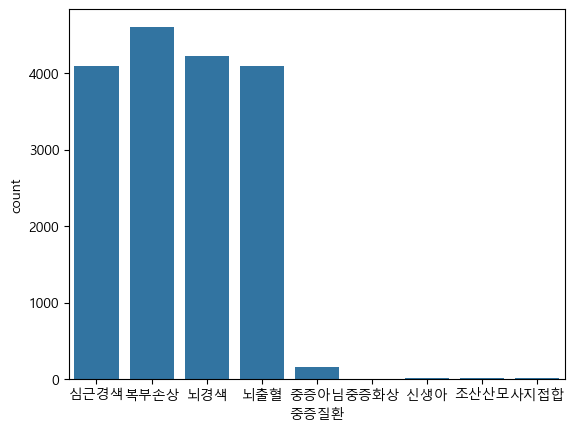

In [47]:
# seaborn 라이브러리의 countplot 함수을 사용하여 '중증질환' 컬럼의 범주별 개수 시각화 

sns.countplot(x = data['중증질환'])
plt.show()

* 중증 질환 중 [심근경색, 복부손상, 뇌경색, 뇌출혈]에 대한 자료만 추출하여 분석

In [48]:
# data 데이터프레임에서 '중증질환'값이 ['심근경색', '복부손상', '뇌경색', '뇌출혈'] 에 포함되는 경우만을 추출하여 desease 변수에 저장
# 이후 desease 데이터 프레임을 활용하여 분석
# isin() 활용

desease = data[data['중증질환'].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]
desease

ID       출동일시    이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  \
0      P10715 2023-09-30   성**  여자  65  36.9     102      66      1       0   
1      P10959 2023-10-26   표**  남자  86  36.7     106      72      0       0   
2      P11863 2023-10-05   변**  여자  21  38.1     120      77      0       0   
3      P12186 2023-10-17   도**  남자  57  36.5     129      75      0       0   
4      P15043 2023-10-01   송**  여자  88  39.1     103      65      0       0   
...       ...        ...   ...  ..  ..   ...     ...     ...    ...     ...   
17205  P20482 2023-10-20  제갈**  여자   4  36.3     101      73      0       0   
17206  P21742 2023-10-20   기**  여자  22  36.9     106      83      0       0   
17207  P22512 2023-10-20   표**  여자  65  36.9      95      78      0       0   
17208  P24482 2023-10-20   채**  남자  14  36.3     105      72      0       0   
17209  P27091 2023-10-20   염**  남자  75  36.5     133      78      0       0   

       ...  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간   연령구분  출동월  발열  고혈압  저혈압  
0      ...   1         0        0  심근경색      8    60대    9   0    0    0  
1      ...   0         0        0  복부손상     40    80대   10   0    0    0  
2      ...   0         0        0  복부손상     27    20대   10   1    0    0  
3      ...   1         0        0   뇌경색     26    50대   10   0    0    0  
4      ...   0         0        0  복부손상     62    80대   10   1    0    0  
...    ...  ..       ...      ...   ...    ...    ...  ...  ..  ...  ...  
17205  ...   0         0        0   뇌경색     44  10대미만   10   0    0    0  
17206  ...   0         0        1   뇌출혈     33    20대   10   0    0    0  
17207  ...   0         1        0   뇌출혈     18    60대   10   0    0    0  
17208  ...   0         1        0   뇌출혈     60    10대   10   0    0    0  
17209  ...   0         0        0  복부손상      5    70대   10   0    0    0  

[17025 rows x 28 columns]

In [49]:
# desease의 '중증질환' 컬럼의 고유한 값(범주) 별 개수 카운트

desease['중증질환'].value_counts()

복부손상    4608
뇌경색     4224
심근경색    4097
뇌출혈     4096
Name: 중증질환, dtype: int64

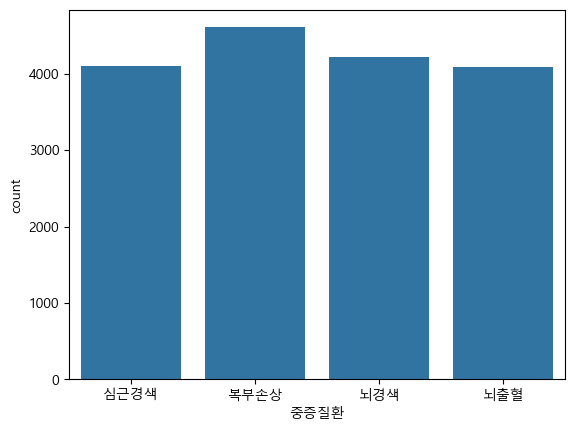

In [50]:
# seaborn 라이브러리의 countplot 함수을 사용하여 desease 데이터프레임의 '중증질환' 컬럼의 범주별 개수 시각화 

sns.countplot(x=desease['중증질환'])
plt.show()

In [51]:
# 질문) 어느 중증질환에 출동 건수가 많았나요?
# 질문) 중증질환별 출동 건수에 차이가 있나요?

from scipy.stats import chisquare

print('질문) 어느 중증질환에 출동 건수가 많았나요?','복부손상')
print('중증질환별 출동 건수에 차이가 있나요?','네')
display(chisquare(desease['중증질환'].value_counts() ))

질문) 어느 중증질환에 출동 건수가 많았나요? 복부손상
중증질환별 출동 건수에 차이가 있나요? 네


Power_divergenceResult(statistic=41.30602055800294, pvalue=5.631378844813475e-09)

In [52]:
# '연령구분' 컬럼의 고유한 값(범주) 별 개수 카운트
desease['연령구분'].value_counts()

80대      3091
70대      3002
60대      2158
50대      2143
40대      1703
30대      1626
10대      1175
10대미만    1022
20대       708
90이상      397
신생아         0
Name: 연령구분, dtype: int64

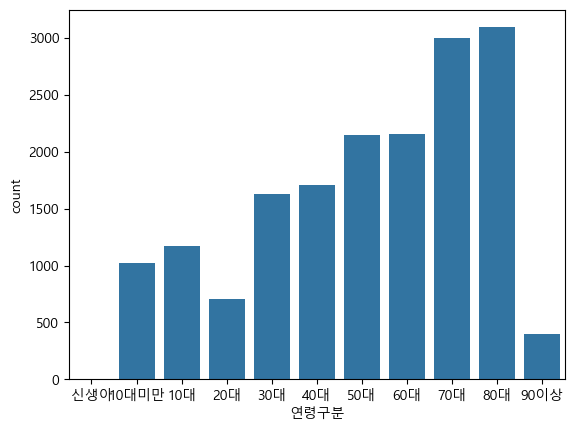

In [53]:
# seaborn 라이브러리의 countplot 함수을 사용하여 desease 데이터프레임의 '연령구분' 컬럼의 범주별 개수 시각화 

sns.countplot(x=desease['연령구분'])
plt.show()

In [54]:
#질문) 어느 연령대가 가장 많은가요?
#질문) 연령대별로 출동 건수의 차이가 있나요?

print('질문) 어느 중증질환에 출동 건수가 많았나요?','80대')
print('연령대별로 출동 건수에 차이가 있나요?','네')
display(chisquare(desease['연령구분'].value_counts() ))

질문) 어느 중증질환에 출동 건수가 많았나요? 80대
연령대별로 출동 건수에 차이가 있나요? 네


Power_divergenceResult(statistic=6521.632305433187, pvalue=0.0)

### 4) 단변량 분석 - 숫자형 데이터
* 대상 : 체온

In [55]:
# 체온 컬럼에 대한 기초 통계 정보 확인하기, describe()

desease['체온'].describe()

count    17025.000000
mean        36.599424
std          0.635970
min         36.000000
25%         36.200000
50%         36.500000
75%         36.800000
max         39.900000
Name: 체온, dtype: float64

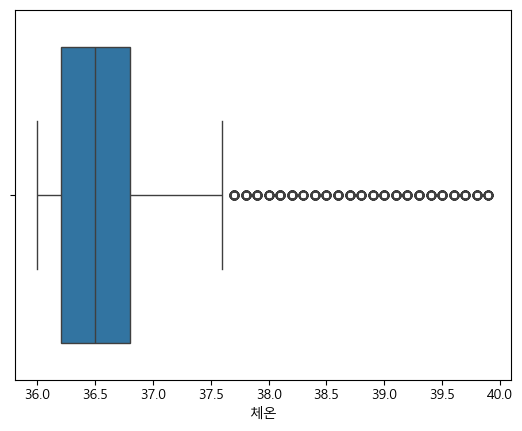

In [56]:
# seaborn의 boxplot을 이용하여 '체온' 컬럼의 분포를 시각화

sns.boxplot(x=desease['체온'])
plt.show()

In [57]:
# 질문) 체온 컬럼의 데이터 분포는 어떠한가?
# 질문) 체온 컬럼의 데이터에 이상치가 존재하는가? 
# 질문) 이상치 데이터는 제거해야 하는가? 아니면 유지해야 하는가?

print('질문) 체온 컬럼의 데이터 분포는 어떠한가? 36.5도에 쏠려 있다.')
print('질문) 체온 컬럼의 데이터에 이상치가 존재하는가? 존재한다.' )
print('질문) 이상치 데이터는 제거해야 하는가? 아니면 유지해야 하는가? 전문 지식이 없는 상태에서 이상치라고 제거하는 것은 합리적이지 않다.')

질문) 체온 컬럼의 데이터 분포는 어떠한가? 36.5도에 쏠려 있다.
질문) 체온 컬럼의 데이터에 이상치가 존재하는가? 존재한다.
질문) 이상치 데이터는 제거해야 하는가? 아니면 유지해야 하는가? 전문 지식이 없는 상태에서 이상치라고 제거하는 것은 합리적이지 않다.


### 5) 이변량 분석 - 범주 vs 범주

 * Target : 중증 질환
 * Feature : 성별, 연령구분, 출동월, 증상 리스트

In [58]:
# 1) Feature : 성별, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 성별로 중증 질환에 차이가 없다
# 대립 가설 : 성별로 중증 질환에 차이가 있다.

In [59]:
# pandas의 crosstab을 이용하여 feature, target 범주값에 대한 교차 빈도 확인
# 변수명 : cross_sex

cross_sex = pd.crosstab( desease['성별'], desease['중증질환'] )
display(cross_sex)

# 통계 검증 : 카이제곱 검증 (chi2_contingency) 
# 상관계수와 p-value 확인

chi2_sex = spst.chi2_contingency(cross_sex)
display(chi2_sex)

print('pvalue가 0.05보다 크므로 유의미한 차이가 없다.')

중증질환   뇌경색   뇌출혈  복부손상  심근경색
성별                          
남자    2338  2256  2597  2277
여자    1886  1840  2011  1820

Chi2ContingencyResult(statistic=1.6323358900287734, pvalue=0.6520803009584115, dof=3, expected_freq=array([[2349.06502203, 2277.88123348, 2562.61638767, 2278.43735683],
       [1874.93497797, 1818.11876652, 2045.38361233, 1818.56264317]]))

pvalue가 0.05보다 크므로 유의미한 차이가 없다.


In [60]:
# 2) Feature : 연령 구분, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 연령 구분대별로 중증 질환에 차이가 없다
# 대립 가설 : 연령 구분대별로 중증 질환에 차이가 있다.

In [61]:
# pandas의 crosstab을 이용하여 feature, target 범주값에 대한 교차 빈도 확인
# 변수명 : cross_age

cross_age = pd.crosstab(desease['연령구분'], desease['중증질환'])

# 통계 검증 : 카이제곱 검증 (chi2_contingency) 
# 상관계수와 p-value 확인

display(cross_age)
chi2_age = spst.chi2_contingency(cross_age)
chi2_age

중증질환   뇌경색  뇌출혈  복부손상  심근경색
연령구분                       
10대미만  246  251   280   245
10대    314  260   310   291
20대    190  173   190   155
30대    422  380   428   396
40대    417  412   490   384
50대    516  511   580   536
60대    525  503   585   545
70대    743  728   813   718
80대    751  779   816   745
90이상   100   99   116    82

Chi2ContingencyResult(statistic=20.724015260209008, pvalue=0.7990422063221734, dof=27, expected_freq=array([[253.56405286, 245.88029369, 276.6153304 , 245.94032305],
       [291.52422907, 282.69016153, 318.02643172, 282.75917768],
       [175.65885463, 170.33585903, 191.62784141, 170.37744493],
       [403.41991189, 391.19506608, 440.09444934, 391.29057269],
       [422.52405286, 409.72029369, 460.9353304 , 409.82032305],
       [531.69057269, 515.57873715, 580.0260793 , 515.70461087],
       [535.41215859, 519.18754772, 584.08599119, 519.3143025 ],
       [744.81339207, 722.24328928, 812.52370044, 722.41961821],
       [766.89480176, 743.65556535, 836.61251101, 743.83712188],
       [ 98.49797357,  95.51318649, 107.4523348 ,  95.53650514]]))

In [301]:
# 3) Feature : 출동월, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 출동월별로 중증 질환에 차이가 없다
# 대립 가설 : 출동월별로 중증 질환에 차이가 있다.

In [62]:
# pandas의 crosstab을 이용하여 feature, target 범주값에 대한 교차 빈도 확인
# 변수명 : cross_month

cross_month = pd.crosstab(desease['출동월'], desease['중증질환'])

# 통계 검증 : 카이제곱 검증 (chi2_contingency) 
# 상관계수와 p-value 확인

display(cross_month)
chi_month = spst.chi2_contingency(cross_month)
chi_month

중증질환  뇌경색  뇌출혈  복부손상  심근경색
출동월                       
1     306  320   329   310
2     365  373   426   346
3     426  465   491   460
4     424  389   461   443
5     474  433   455   440
6     421  402   492   410
7     455  447   492   419
8     461  392   492   447
9     445  453   489   412
10    439  413   472   406
11      8    9     9     4

Chi2ContingencyResult(statistic=27.42678513398077, pvalue=0.6007840032980715, dof=30, expected_freq=array([[313.85374449, 304.34302496, 342.38590308, 304.41732746],
       [374.63964758, 363.28693098, 408.69779736, 363.37562408],
       [457.0107489 , 443.16193833, 498.55718062, 443.27013216],
       [425.99753304, 413.08851689, 464.7245815 , 413.18936858],
       [447.08651982, 433.53844347, 487.7307489 , 433.64428781],
       [427.98237885, 415.01321586, 466.88986784, 415.11453744],
       [449.81568282, 436.18490455, 490.70801762, 436.29139501],
       [444.60546256, 431.13256975, 485.02414097, 431.23782673],
       [446.34220264, 432.81668135, 486.91876652, 432.92234949],
       [429.22290749, 416.21615272, 468.24317181, 416.31776799],
       [  7.44317181,   7.21762115,   8.11982379,   7.21938326]]))

In [303]:
# 4) Feature : 증상리스트, Target : 중증 질환
# 가설 수립
# 귀무 가설 : 각 증상별로 중증 질환에 차이가 없다
# 대립 가설 : 각 증상별로 중증 질환에 차이가 있다.

In [64]:
# 증상 리스트 정의

symptom = ['호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도',
       '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']

In [66]:
# for문을 이용하여 각 증상과 중증질환과의 관계 분석

for one_sym in symptom:

    # pandas의 crosstab을 이용하여 feature, target 범주값에 대한 교차 빈도 확인
    # 변수명 : cross_sym
    cross_sym = pd.crosstab(data[one_sym], desease['중증질환'])
    # display(cross_sym)
    # 통계 검증 : 카이제곱 검증 (chi2_contingency) 
    # 상관계수와 p-value 확인

    chi2_sym = spst.chi2_contingency(cross_sym)

    ## P-value (chi2_sym[1]) 값이 0.05보다 크면 귀무가설 채택, 0.05보다 작으면 대립가설 채택

    if chi2_sym[1] >= 0.05 :
        print("귀무가설 채택", one_sym, "에 따라 중증 질환에 차이가 없다. P-value ", chi2_sym[1])
    else:
        print("대립가설 채택", one_sym, "에 따라 중증 질환에 차이가 있다. P-value ", chi2_sym[1])
    

대립가설 채택 호흡 곤란 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 간헐성 경련 에 따라 중증 질환에 차이가 있다. P-value  4.787738645829797e-258
대립가설 채택 설사 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 기침 에 따라 중증 질환에 차이가 있다. P-value  9.191766041358236e-233
대립가설 채택 출혈 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 통증 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 만지면 아프다 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 무감각 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 마비 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 현기증 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 졸도 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 말이 어눌해졌다 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 시력이 흐려짐 에 따라 중증 질환에 차이가 있다. P-value  0.0
대립가설 채택 발열 에 따라 중증 질환에 차이가 있다. P-value  8.776251786570273e-200
대립가설 채택 고혈압 에 따라 중증 질환에 차이가 있다. P-value  0.0038235366142048447
대립가설 채택 저혈압 에 따라 중증 질환에 차이가 있다. P-value  2.867081511918155e-39


In [306]:
# 질문) 범주형 vc 범주형 이변량 분석 결과를 정리하세요



### 6) 이변량 분석 - 숫자형 vc 범주형

 * Target : 중증 질환
 * Feature : 나이, 체온, 수축기 혈압, 이완기 혈압

In [307]:
# 가설 수립
# 귀무 가설 : feature에 따라 중증 질환에 차이가 없다
# 대립 가설 : feature에 따라 중증 질환에 차이가 있다.

In [67]:
# anova 분석 대상 리스트 확인

anova_column = ['나이', '체온', '수축기 혈압', '이완기 혈압']

# for문을 이용하여 feature 데이터 하나씩 순차적으로 분석하기 
# 중증질환별로 feature 데이터를 분리하고, anova 검증 결과를 확인

for one_column in anova_column:
    # 중증질환별로 데이터 분리하기
    Class_1= desease.loc[desease['중증질환'] == "뇌출혈", one_column]
    Class_2= desease.loc[desease['중증질환'] == "뇌경색", one_column]
    Class_3= desease.loc[desease['중증질환'] == "복부손상", one_column]
    Class_4= desease.loc[desease['중증질환'] == "심근경색", one_column]

    # 통계 검증 : anova검증 (f_oneway)
    result  = spst.f_oneway(Class_1,Class_2, Class_3, Class_4)

    # p-value 확인하기
    print(result)
    print(result[1])
    

F_onewayResult(statistic=0.9753355966078867, pvalue=0.4032008856528455)
0.4032008856528455
F_onewayResult(statistic=201.86344415603827, pvalue=1.1727742884213586e-128)
1.1727742884213586e-128
F_onewayResult(statistic=7.310971381793121, pvalue=6.779786822766033e-05)
6.779786822766033e-05
F_onewayResult(statistic=12.692008838060291, pvalue=2.7791745009929158e-08)
2.7791745009929158e-08


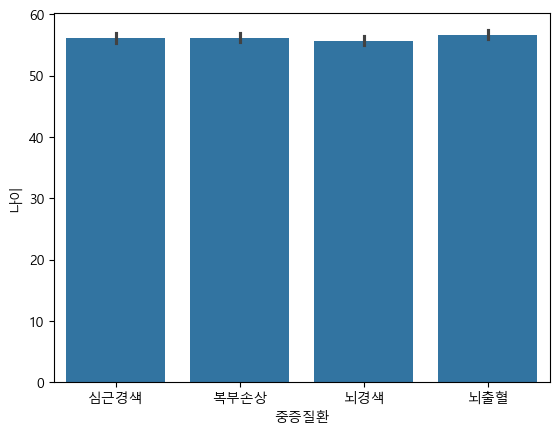

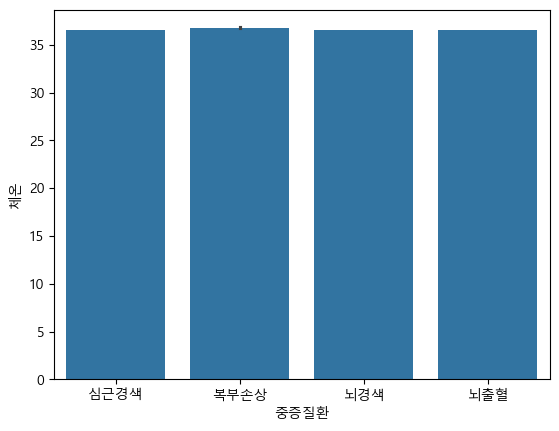

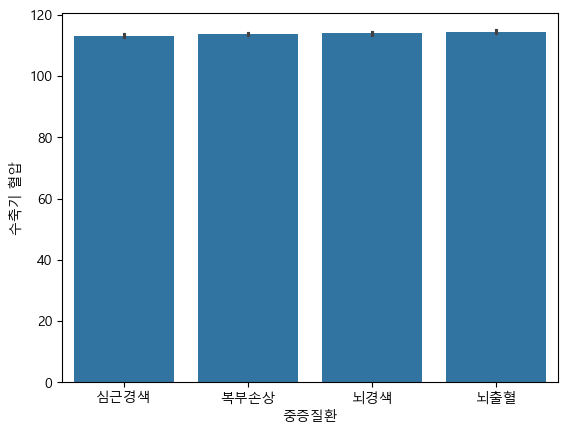

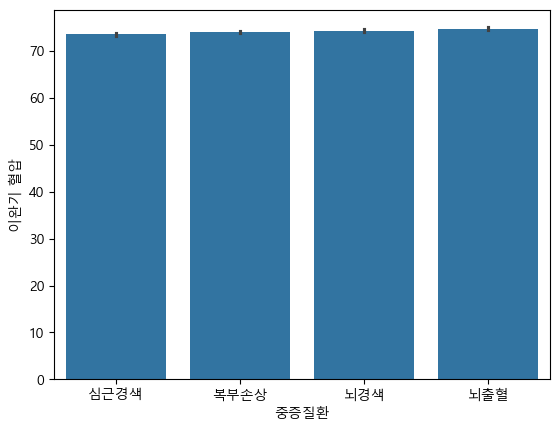

In [309]:
# for문을 이용하여 feature 데이터 하나씩 순차적으로 분석하기 
# seaborn의 barplot 활용하여 중증질환별 feature값 분포의 차이를 시각화

for one_column in anova_column:
    sns.barplot(data = desease, x='중증질환', y = one_column)
    plt.show()

In [310]:
# 질문) 숫자형 vc 범주형 이변량 분석 결과를 정리하세요



### 7) 데이터 분석 결과

In [311]:
# 질문) 데이터 분석 결과, AI 모델링에 반영할 Feature는 무엇인가요?



### 8) 데이터 전처리 함수 만들기

 * 함수로 전처리 과정을 정의
   * 1. 함수 선언하기
   * 2. 데이터 전처리 하기 : 발열, 고혈압, 저혈압
   * 3. Y에 Target(중증질환) 값 넣기
   * 4. X에 위 분석 결과에서 선택된 Feature들 넣기
   * 5. X, Y 반환하기
 

In [312]:
desease.head(5)

ID       출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  ...  \
0  P10715 2023-09-30  성**  여자  65  36.9     102      66      1       0  ...   
1  P10959 2023-10-26  표**  남자  86  36.7     106      72      0       0  ...   
2  P11863 2023-10-05  변**  여자  21  38.1     120      77      0       0  ...   
3  P12186 2023-10-17  도**  남자  57  36.5     129      75      0       0  ...   
4  P15043 2023-10-01  송**  여자  88  39.1     103      65      0       0  ...   

   졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  연령구분  출동월  발열  고혈압  저혈압  
0   1         0        0  심근경색      8   60대    9   0    0    0  
1   0         0        0  복부손상     40   80대   10   0    0    0  
2   0         0        0  복부손상     27   20대   10   1    0    0  
3   1         0        0   뇌경색     26   50대   10   0    0    0  
4   0         0        0  복부손상     62   80대   10   1    0    0  

[5 rows x 28 columns]

In [313]:
#########################################
# 1. 함수 선언하기                       #
#########################################
# 함수명 : preprocessing
# 매개변수 : desease (응급 출동 데이터 중 중증 질환이 ['심근경색', '복부손상', '뇌경색', '뇌출혈']인 데이터프레임)

def preprocessing(desease):

    desease = desease.copy()
    #########################################
    # 2. 데이터 전처리 하기                  #
    #########################################
    
    # '발열' 컬럼 구하기 : 체온이 37도 이상이면 1, 아니면 0
    desease['발열'] = [1 if x>=37  else 0 for x in desease['체온']]

    # '고혈압' 칼럼 구하기 : 수축기 혈압이 140 이상이면 1, 아니면 0
    desease['고혈압'] = [ 1 if x>=140  else 0 for x in desease['수축기 혈압']]

    # '저혈압' 칼럼 구하기 : 수축기 혈압이 90 이하이면 1, 아니면 0
    desease['저혈압'] = [ 1 if x<= 90  else 0 for x in desease['수축기 혈압']]
    
    #########################################
    # 3. X에 선택된 Feature값 넣기           #
    #########################################
    # X : '중증질환' 및 데이터분석에서 Target에 영향을 주지 않는 칼럼 제외한 나머지
    # X = desease.drop(columns =['출동일시','중증질환', 'ID','이름', '성별', '나이','이송 시간'] )
    
    X = desease[['체온', '수축기 혈압', '이완기 혈압', '호흡 곤란','간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', 
           '무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']]
    
    # 4. X 반환하기                       #
    #########################################

    return X

In [314]:
## 확인하기

data = pd.read_csv("./119_emergency_dispatch.csv", encoding="cp949" )
desease = data[data['중증질환'].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]

X = preprocessing(desease)
print(X.shape)
X.head()

(17025, 19)


체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  설사  기침  출혈  통증  만지면 아프다  무감각  마비  현기증  \
0  36.9     102      66      1       0   0   0   0   0        0    0   0    0   
1  36.7     106      72      0       0   0   0   0   0        1    0   0    0   
2  38.1     120      77      0       0   1   0   0   0        1    0   0    0   
3  36.5     129      75      0       0   0   0   0   0        0    0   0    0   
4  39.1     103      65      0       0   1   0   0   0        1    0   0    0   

   졸도  말이 어눌해졌다  시력이 흐려짐  발열  고혈압  저혈압  
0   1         0        0   0    0    0  
1   0         0        0   0    0    0  
2   0         0        0   1    0    0  
3   1         0        0   0    0    0  
4   0         0        0   1    0    0

## 미션#2 Clear
## 수고하셨습니다!!

## 추가

In [316]:
data

ID        출동일시    이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  \
0      P10715  2023-09-30   성**  여자  65  36.9     102      66      1       0   
1      P10959  2023-10-26   표**  남자  86  36.7     106      72      0       0   
2      P11863  2023-10-05   변**  여자  21  38.1     120      77      0       0   
3      P12186  2023-10-17   도**  남자  57  36.5     129      75      0       0   
4      P15043  2023-10-01   송**  여자  88  39.1     103      65      0       0   
...       ...         ...   ...  ..  ..   ...     ...     ...    ...     ...   
17205  P20482  2023-10-20  제갈**  여자   4  36.3     101      73      0       0   
17206  P21742  2023-10-20   기**  여자  22  36.9     106      83      0       0   
17207  P22512  2023-10-20   표**  여자  65  36.9      95      78      0       0   
17208  P24482  2023-10-20   채**  남자  14  36.3     105      72      0       0   
17209  P27091  2023-10-20   염**  남자  75  36.5     133      78      0       0   

       ...  통증  만지면 아프다  무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  
0      ...   0        0    0   0    0   1         0        0  심근경색      8  
1      ...   0        1    0   0    0   0         0        0  복부손상     40  
2      ...   0        1    0   0    0   0         0        0  복부손상     27  
3      ...   0        0    0   0    0   1         0        0   뇌경색     26  
4      ...   0        1    0   0    0   0         0        0  복부손상     62  
...    ...  ..      ...  ...  ..  ...  ..       ...      ...   ...    ...  
17205  ...   0        0    1   0    0   0         0        0   뇌경색     44  
17206  ...   0        0    0   1    0   0         0        1   뇌출혈     33  
17207  ...   0        0    1   0    0   0         1        0   뇌출혈     18  
17208  ...   0        0    1   0    0   0         1        0   뇌출혈     60  
17209  ...   0        0    0   0    0   0         0        0  복부손상      5  

[17210 rows x 23 columns]

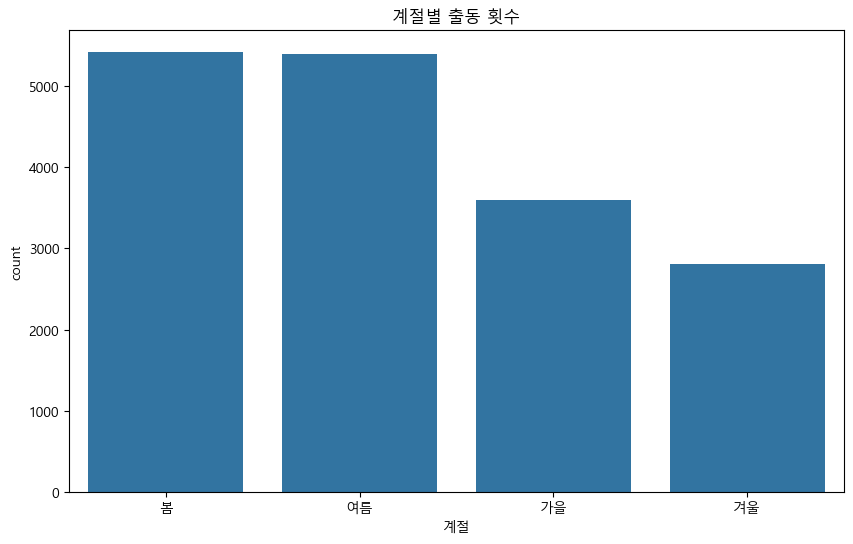

In [327]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['출동일시'] = pd.to_datetime(data['출동일시'])
data['출동월'] = data['출동일시'].dt.month
data.head()

# 계절 분류 함수
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 출동월을 계절로 변환
data['계절'] = data['출동월'].apply(get_season)

# 바 차트 그리기
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='계절', order=['봄', '여름', '가을', '겨울'])
plt.title('계절별 출동 횟수')
plt.show()





In [336]:
# data 데이터프레임에서 '중증질환'값이 ['심근경색', '복부손상', '뇌경색', '뇌출혈'] 에 포함되는 경우만을 추출하여 desease 변수에 저장
# 이후 desease 데이터 프레임을 활용하여 분석
# isin() 활용

desease = data[data['중증질환'].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]
desease

ID       출동일시    이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  \
0      P10715 2023-09-30   성**  여자  65  36.9     102      66      1       0   
1      P10959 2023-10-26   표**  남자  86  36.7     106      72      0       0   
2      P11863 2023-10-05   변**  여자  21  38.1     120      77      0       0   
3      P12186 2023-10-17   도**  남자  57  36.5     129      75      0       0   
4      P15043 2023-10-01   송**  여자  88  39.1     103      65      0       0   
...       ...        ...   ...  ..  ..   ...     ...     ...    ...     ...   
17205  P20482 2023-10-20  제갈**  여자   4  36.3     101      73      0       0   
17206  P21742 2023-10-20   기**  여자  22  36.9     106      83      0       0   
17207  P22512 2023-10-20   표**  여자  65  36.9      95      78      0       0   
17208  P24482 2023-10-20   채**  남자  14  36.3     105      72      0       0   
17209  P27091 2023-10-20   염**  남자  75  36.5     133      78      0       0   

       ...  무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  출동월  계절  
0      ...    0   0    0   1         0        0  심근경색      8    9  가을  
1      ...    0   0    0   0         0        0  복부손상     40   10  가을  
2      ...    0   0    0   0         0        0  복부손상     27   10  가을  
3      ...    0   0    0   1         0        0   뇌경색     26   10  가을  
4      ...    0   0    0   0         0        0  복부손상     62   10  가을  
...    ...  ...  ..  ...  ..       ...      ...   ...    ...  ...  ..  
17205  ...    1   0    0   0         0        0   뇌경색     44   10  가을  
17206  ...    0   1    0   0         0        1   뇌출혈     33   10  가을  
17207  ...    1   0    0   0         1        0   뇌출혈     18   10  가을  
17208  ...    1   0    0   0         1        0   뇌출혈     60   10  가을  
17209  ...    0   0    0   0         0        0  복부손상      5   10  가을  

[17025 rows x 25 columns]

In [353]:
data.head()

ID        출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  ...  \
0  P10715  2023-09-30  성**  여자  65  36.9     102      66      1       0  ...   
1  P10959  2023-10-26  표**  남자  86  36.7     106      72      0       0  ...   
2  P11863  2023-10-05  변**  여자  21  38.1     120      77      0       0  ...   
3  P12186  2023-10-17  도**  남자  57  36.5     129      75      0       0  ...   
4  P15043  2023-10-01  송**  여자  88  39.1     103      65      0       0  ...   

   만지면 아프다  무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  연령구분  
0        0    0   0    0   1         0        0  심근경색      8   60대  
1        1    0   0    0   0         0        0  복부손상     40   80대  
2        1    0   0    0   0         0        0  복부손상     27   20대  
3        0    0   0    0   1         0        0   뇌경색     26   50대  
4        1    0   0    0   0         0        0  복부손상     62   80대  

[5 rows x 24 columns]

In [359]:
data[[ '중증질환','연령구분' ]]

중증질환   연령구분
0      심근경색    60대
1      복부손상    80대
2      복부손상    20대
3       뇌경색    50대
4      복부손상    80대
...     ...    ...
17205   뇌경색  10대미만
17206   뇌출혈    20대
17207   뇌출혈    60대
17208   뇌출혈    10대
17209  복부손상    70대

[17210 rows x 2 columns]

In [364]:
data.loc[ (data['연령구분'] == '20대') & (data['중증질환']=='복부손상') ]

ID        출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  \
2      P11863  2023-10-05  변**  여자  21  38.1     120      77      0       0   
178    P22405  2023-10-27  당**  남자  27  36.0      98      73      0       0   
200    P16645  2023-10-13  맹**  여자  24  36.4     118      80      0       0   
351    P11158  2023-10-13  조**  남자  25  38.7     116      77      0       0   
418    P17699  2023-10-30  유**  여자  23  39.7     108      82      0       0   
...       ...         ...  ...  ..  ..   ...     ...     ...    ...     ...   
16758  P11072  2023-10-03  창**  남자  22  36.2     127      67      0       0   
16881  P13837  2023-10-08  허**  여자  21  36.1     131      79      0       0   
17000  P10016  2023-10-13  심**  여자  20  36.7      97      66      0       0   
17108  P23378  2023-10-16  국**  남자  23  39.1     114      73      0       0   
17151  P13280  2023-10-18  배**  여자  24  36.1     121      83      0       0   

       ...  만지면 아프다  무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간  연령구분  
2      ...        1    0   0    0   0         0        0  복부손상     27   20대  
178    ...        1    0   0    0   0         0        0  복부손상     24   20대  
200    ...        1    0   0    0   0         0        0  복부손상     23   20대  
351    ...        1    0   0    0   0         0        0  복부손상     55   20대  
418    ...        1    0   0    0   0         0        0  복부손상     63   20대  
...    ...      ...  ...  ..  ...  ..       ...      ...   ...    ...   ...  
16758  ...        0    0   0    0   0         0        0  복부손상     60   20대  
16881  ...        1    0   0    0   0         0        0  복부손상     59   20대  
17000  ...        0    1   0    0   0         0        0  복부손상     67   20대  
17108  ...        1    0   0    0   0         0        0  복부손상     15   20대  
17151  ...        0    0   0    0   0         0        0  복부손상     24   20대  

[190 rows x 24 columns]

<Axes: xlabel='중증질환', ylabel='count'>

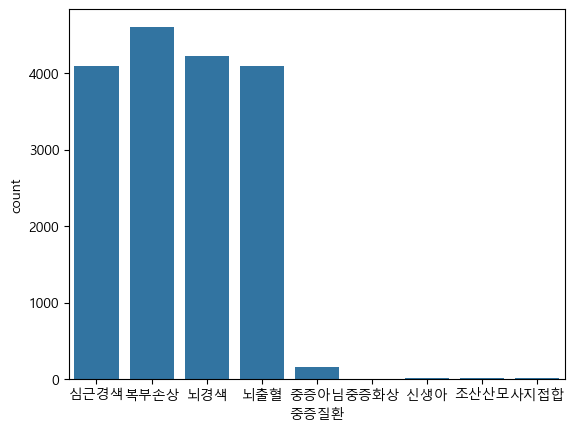

In [404]:
sns.countplot(data=data, x = '중증질환')

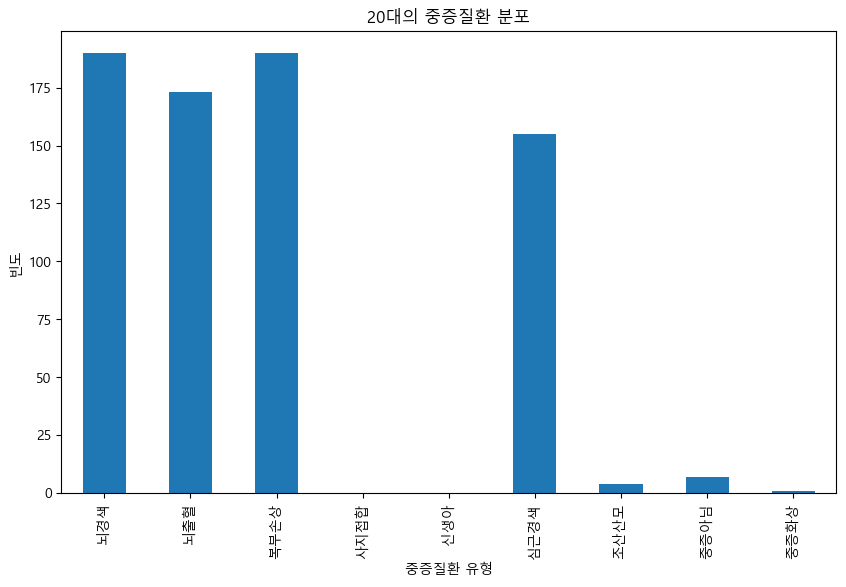

In [399]:
twenty_data = cross_tab.loc['20대']
twenty_data.plot(kind='bar', figsize=(10,6))
plt.title("20대의 중증질환 분포")
plt.ylabel("빈도")
plt.xlabel("중증질환 유형")
plt.show()

In [401]:
data.loc[data['중증질환'] == '신생아']

ID        출동일시   이름  성별  나이    체온  수축기 혈압  이완기 혈압  호흡 곤란  간헐성 경련  \
646    P23733  2023-07-07  유**  여자  69  39.0     128      71      0       0   
3224   P24215  2023-06-19  시**  남자  69  37.8      98      67      0       0   
10194  P27159  2023-01-25  석**  여자  36  36.2     135      67      1       0   
10205  P19159  2023-01-26  천**  여자  85  36.1     124      74      0       1   
10368  P17887  2023-02-01  호**  여자   9  36.6     101      81      0       0   
10491  P26375  2023-02-05  음**  여자  60  39.1     110      78      0       0   
11408  P18175  2023-03-11  견**  남자  50  38.2     133      76      1       0   
15705  P26055  2023-08-23  윤**  남자  37  38.5     120      80      0       0   
16141  P20957  2023-09-09  추**  여자  41  36.9     131      83      0       0   

       ...  만지면 아프다  무감각  마비  현기증  졸도  말이 어눌해졌다  시력이 흐려짐  중증질환  이송 시간   연령구분  
646    ...        0    0   0    0   0         0        0   신생아     43    60대  
3224   ...        0    0   0    0   0         0        0   신생아     24    60대  
10194  ...        0    0   0    0   0         0        0   신생아     51    30대  
10205  ...        0    0   0    0   0         0        0   신생아     16    80대  
10368  ...        0    0   0    0   0         0        0   신생아     61  10대미만  
10491  ...        0    0   0    0   0         0        0   신생아     53    60대  
11408  ...        0    0   0    0   0         0        0   신생아     35    50대  
15705  ...        0    0   0    0   0         0        0   신생아     52    30대  
16141  ...        0    0   0    0   0         0        0   신생아     43    40대  

[9 rows x 24 columns]

In [405]:
cross_tab

중증질환   뇌경색  뇌출혈  복부손상  사지접합  신생아  심근경색  조산산모  중증아님  중증화상
연령구분                                                    
신생아     51   51    57     0    0    37     0     3     0
10대미만  195  200   223     0    1   208     0     7     0
10대    314  260   310     1    0   291     0     2     0
20대    190  173   190     0    0   155     4     7     1
30대    422  380   428     1    2   396     7    21     0
40대    417  412   490     0    1   384     1    19     0
50대    516  511   580     1    1   536     0    15     1
60대    525  503   585     3    3   545     0    23     2
70대    743  728   813     1    0   718     0    27     1
80대    751  779   816     0    1   745     0    22     1
90대이상  100   99   116     0    0    82     0     5     0

## 추가

신생아


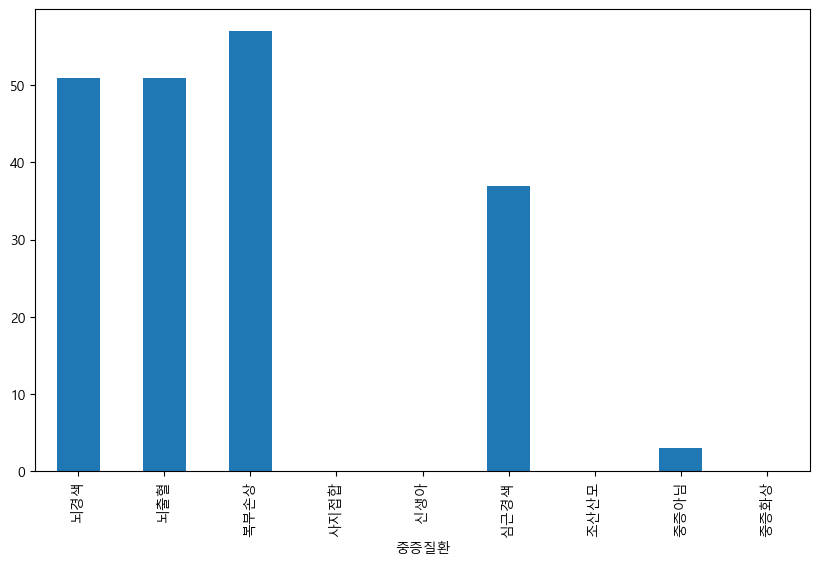

10대미만


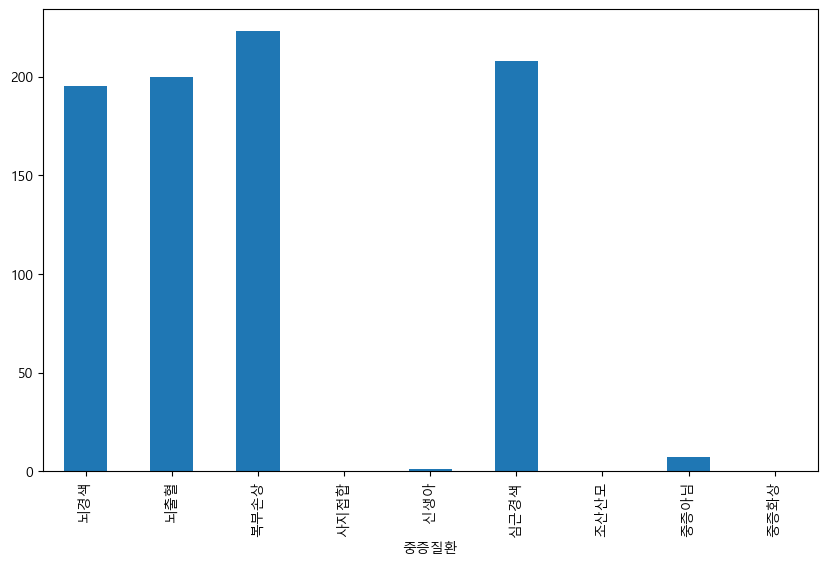

10대


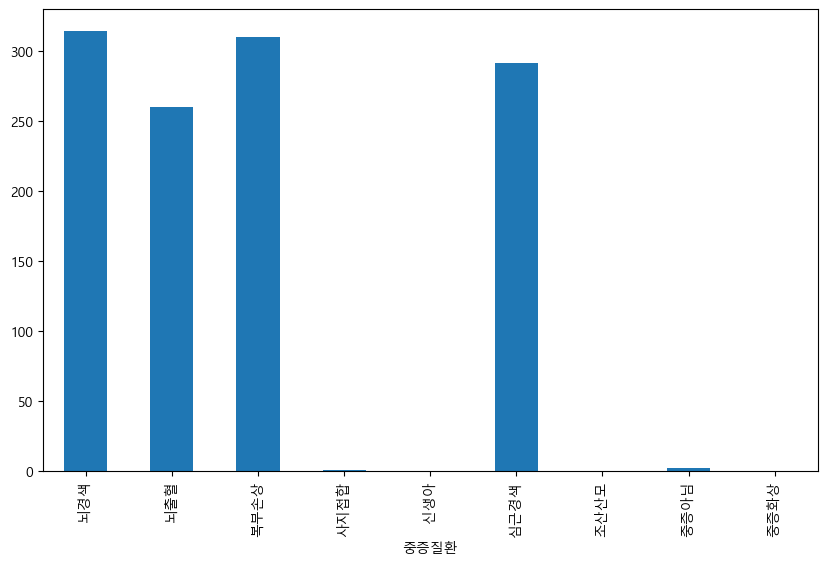

20대


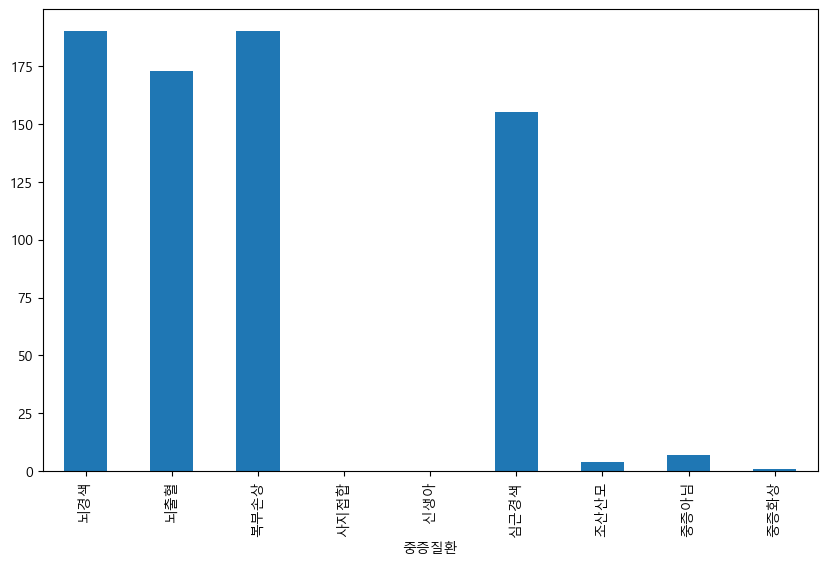

30대


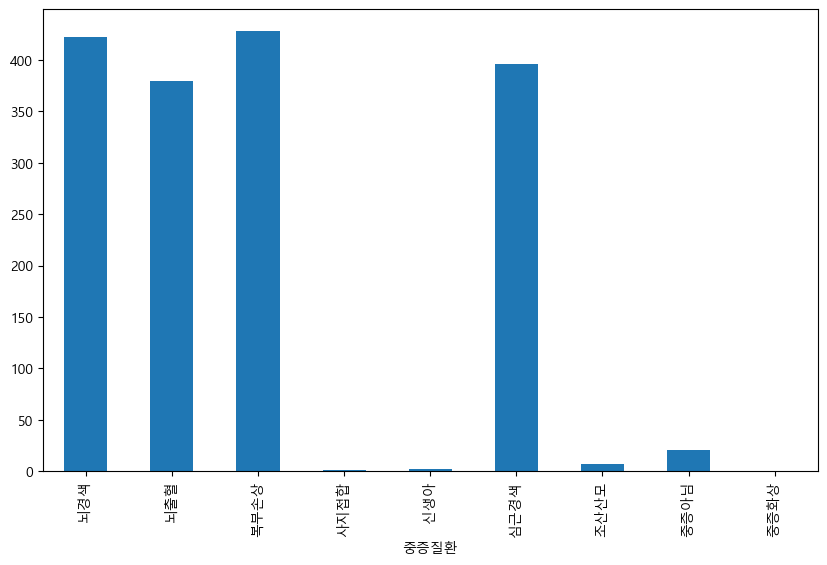

40대


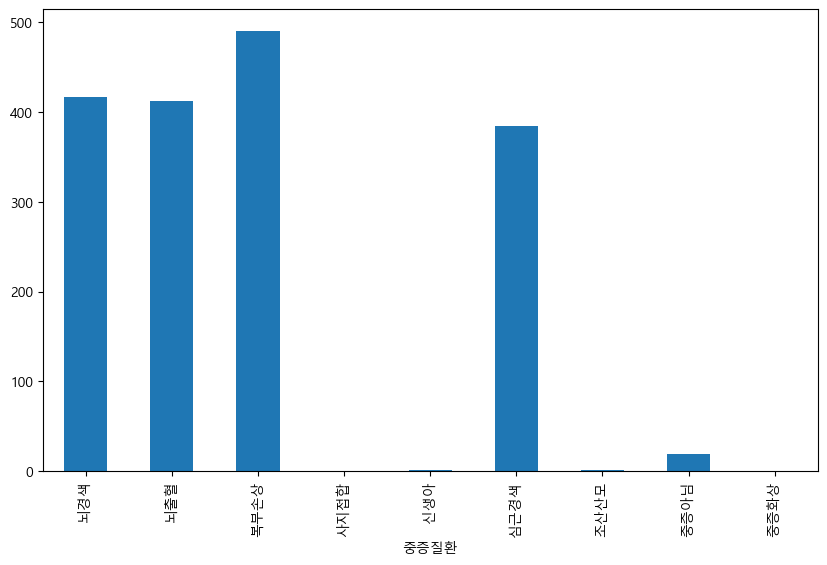

50대


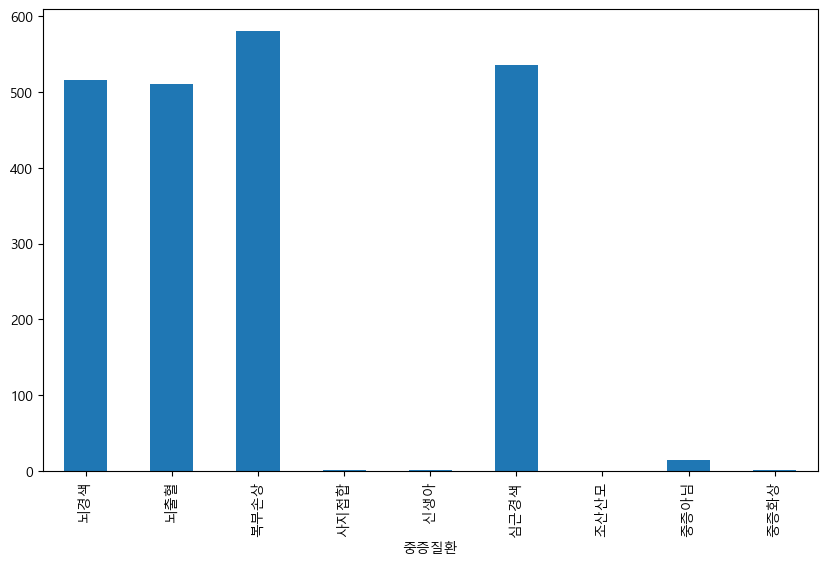

60대


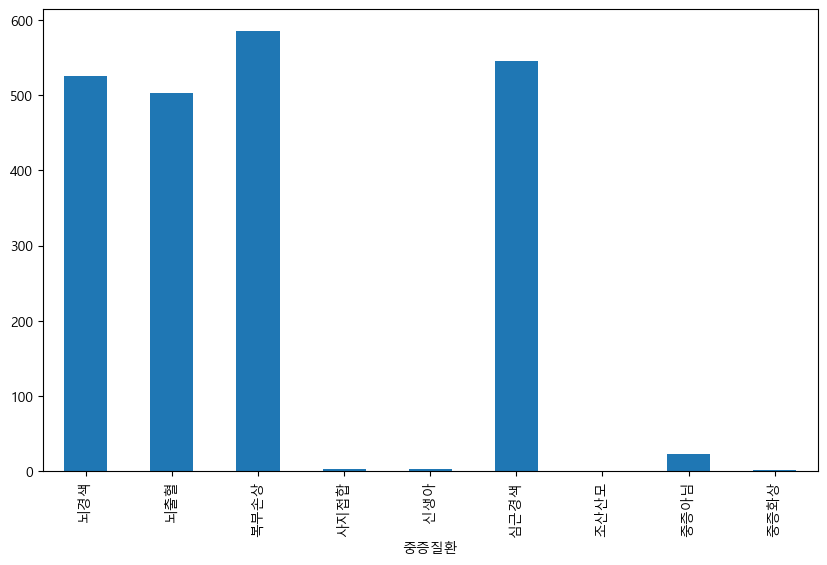

70대


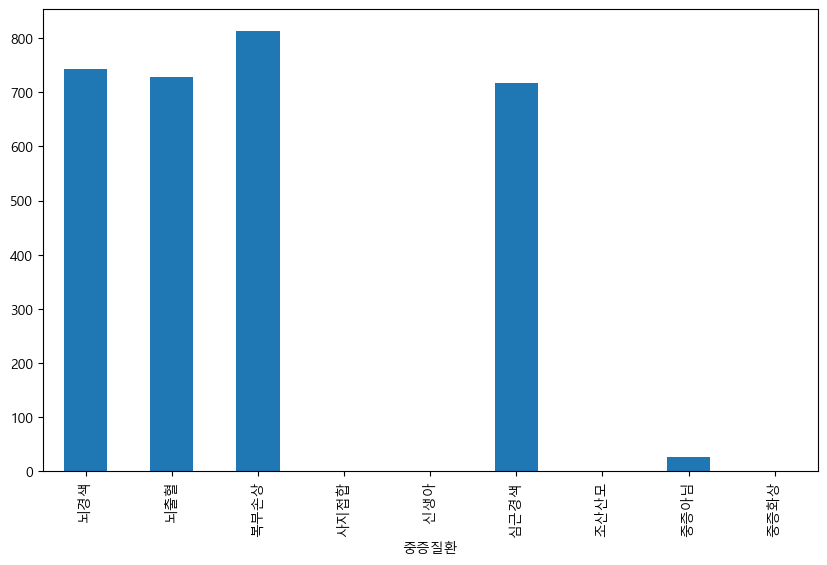

80대


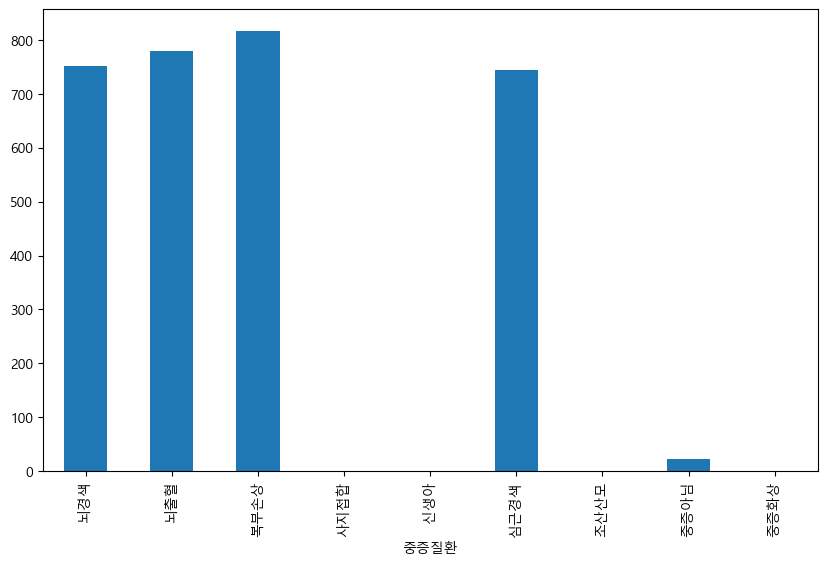

90대이상


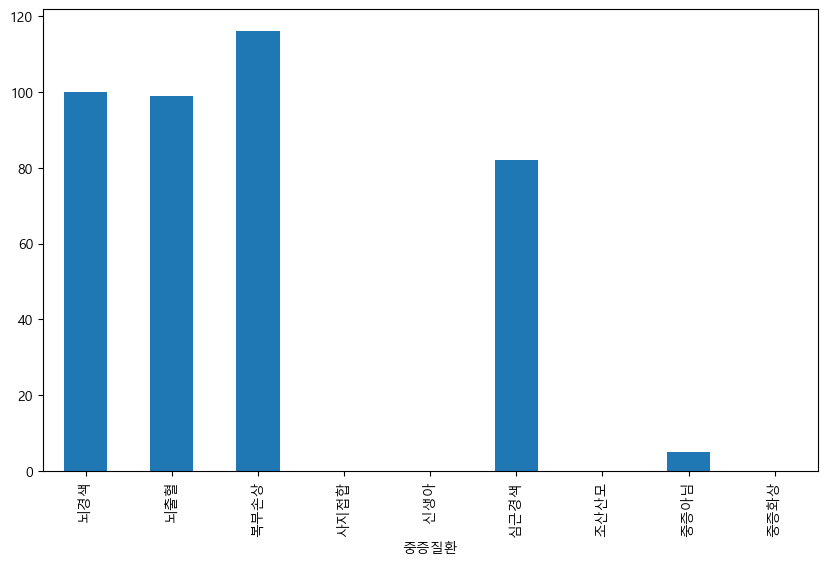

In [400]:
# 빈도표 생성
cross_tab = pd.crosstab(data['연령구분'], data['중증질환'])

for age_group in cross_tab.index:
    print('='*50)
    print('='*50)
    print(age_group)
    cross_tab.loc[age_group].plot(kind='bar', figsize=(10,6))
    plt.show()
    